<a href="https://colab.research.google.com/github/samuel-joh/workshop2025/blob/main/03_network_prep_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/computational-neurology/workshop2025/blob/main/03_network_prep_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Biophysical versus Phenomenological models of brain activity

Broadly speaking, there are two categories of neural mass models: biophysical and phenomenological.

**Biophysical Models**

Biophysical modeling is an approach that aims to capture the biological details of neural populations. This means that biophysical models are grounded in the biophysical properties of neurons, such as ion channel dynamics, neurotransmitter kinetics, and synaptic plasticity. Biophysical models often incorporate detailed representations of biological entities, such as conductances, which correspond to the flow of ions across neuronal membranes.

**Phenomenological Models**

In contrast to biophysical modeling, phenomenological modeling takes a more abstract and high-level approach. Instead of focusing on the detailed biophysical mechanisms, phenomenological models aim to capture the qualitative behavior and emergent properties of neural systems. This means that we have recordings of empirical data and we have some mathematical equations that try to capture these recordings as best as possible. These models often use mathematical frameworks and computational techniques to describe and simulate the observed phenomena without necessarily incorporating the underlying biological details.

*E.g., You can approximate the hourly temperature over the course of a month with a sinusoidal wave, where the temperature will be higher during the day and lower during the night. You have no idea why, but this still allows you to understand some things (like maybe you have higher excursion between day and night in a place i.e., the desert, compared to another). Here, our model provides a mathematical description of the observed phenomenon (periodic temperature changes) without explaining the reasons behind it, such as the Earth's rotation, atmospheric dynamics, or thermodynamics.*

Another good example to understand these models is the study of bird flocks (see video). For example, in the video you can see how each bird moves on its own, but also the flock itself shows some collective movement. Phenomenologically, we could study for example the centroid of the bird flock and its dispersion and this would give us many insights regarding the collective behavior of these animals.



In [1]:
# @title Run to show video, before running make sure your audio is off
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/V4f_1_r80RY?si=b48bVmH2RKoHiOnS&amp;clip=UgkxXnfR53n0TQS9bM4YAsiCLUE1evhLMrTr&amp;clipt=EM2GARjk-wE", width=660, height=315)


<div class="alert alert-block alert-success">
<b> Exercise </b><p>

Try to think about some pros and cons for each group of models, and write them down. Then, scroll down below to compare with what you've written down. Ours are just some examples, so your ideas might be more than valid even though they are not in our list! Feel free to tell us at the beginning of the following lecture if you came up with something else than what we had written!

*Write down your pros and cons of different model types*.....

**Biophysical pro:** Based on actual, meausurable biological processes, so that researchers can link neurological processes to the biophysical workings.

**Biophysical con:** Mass of neurons and their links means a huge complexity, which needs too much computiong power to fully work with without abstracting informations.

**Phenomenological pro:** Provides a more abstract view on neurological processes and thus allows better computation, as less detail is needed.

**Phenomenological con:** Abstracting prohibts researchers from fine tuning the model and its parameters in detail.

## Pros and Cons

**Pros of biophysical models**:
The strength of biophysical modeling lies in its ability to provide a mechanistic understanding of neural processes by directly linking them to the underlying biological components. These models can help researchers explore how specific biophysical parameters influence neural behavior and test hypotheses about the role of different cellular and molecular mechanisms in shaping neural activity.

**Cons of biophysical models**:
The main downside of these models is that the more biological realism comes with a higher number of coupled differential equations to be solved, up to ~thousands for each neuron (e.g., each type of ion channel should have its own equation, then equations for ion channels on dendrites are different depending on the morphology, and so on). Even with massive computing power and parallelism, this currently poses severe technical limitations on the number of neurons we can simulate at the highest level of biological realism (currently ~ some squared cm). Nonetheless we can use simplified models where we describe with just a couple of differential equations the activity of ~millions of neurons, allowing us to simulate whole-brain activity.

**Pros of phenomenological models**:
Phenomenological models are particularly useful when the precise biological mechanisms are not well understood or when the goal is to study the collective behavior of large-scale neural networks. These models can provide insights into the computational principles and information processing capabilities of neural systems, without being constrained by the complexities of biological details. This allows to run several modeling simulations at a large-scale in many individuals, which is currently much more computationally expensive with biophysically detailed models

**Cons of phenomenological models**:
Being phenomenological, these models do not allow us to delve into the molecular, biophysical and cellular mechanisms. This is a great limitation if you want to know exactly what to change in order to achieve a particular state and how to do it.


While biophysical and phenomenological modeling approaches may seem distinct, they are often complementary in computational neuroscience and many models share some degree of both approaches. Biophysical models can inform and constrain phenomenological models by providing a biological foundation and validating the assumptions made in the abstract models. Conversely, phenomenological models can guide the development of biophysical models by identifying relevant phenomena and suggesting potential mechanisms to be explored.

In [2]:
%%capture
import sys
!{sys.executable} -m pip install git+https://github.com/neurolib-dev/neurolib.git
# @title Run this to install dependencies

# Coupled Kuramoto Model


In [3]:
# @title Run to show video of coupled oscillators
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/T58lGKREubo?si=sYdgFrInHaz0yPEL", width=560, height=315)


In the video you can see how oscillators behave when they are connected. What do you notice? How does the movement of each pendulum start with respect to others? How does it end?

=> In the beginning, 3 groups of two times 2 and one pendulum. Over time the groups synchronize due to the connection of the moving plate they stand on.

In [4]:
# This is the same as the code you worked on during class

import numpy as np
import matplotlib.pyplot as plt
# Some useful functions are provided here
import neurolib.utils.functions as func
# Let's import the Kuramoto model
from neurolib.models.kuramoto import KuramotoModel

# Initialize the Kuramoto model for a single node
model = KuramotoModel()
# Set the duration of your simulation
model.params['duration'] = 100
# Set the intrinsic frequency
model.params['omega'] = np.array([.5 * np.pi])
# Set the noise
model.params['sigma_ou'] = 0
# Let's run the model!
model.run()
# Let's look at the outputs of the model
print(model.outputs.keys())

dict_keys(['t', 'theta'])


The model outputs a numpy array containing the times of our simulation and the corresponding phases.

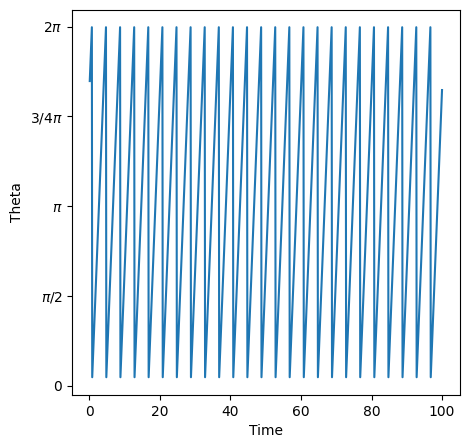

In [5]:
# Get the theta and cap it to only 2 pi ()
theta = model['theta'].T
theta_capped = np.mod(theta, 2*np.pi) # cap theta to [0, 2*pi]
# Plot the phases over time
plt.figure(figsize=(5,5))
plt.plot(model.t, theta_capped)
plt.xlabel("Time")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

In [6]:
#@title Run this cell to enable the widget
from ipywidgets import interact, FloatSlider
# Function to run the model and plot the results
def run_kuramoto_model(frequency=0.5*np.pi, noise=0):
    model = KuramotoModel()
    model.params['duration'] = 100
    model.params['omega'] = np.array([frequency])
    model.params['sigma_ou'] = noise
    model.run()
    plt.plot(model.outputs['t'], model.outputs['theta'].T)
    plt.title('Kuramoto Model Output')
    plt.xlabel('Time')
    plt.ylabel('Theta')
    plt.show()

# Create interactive widgets for frequency and noise
frequency_slider = FloatSlider(min=0, max=np.pi, step=0.1, value=0.5*np.pi, description='Frequency')
noise_slider = FloatSlider(min=0, max=2, step=0.1, value=0, description='Noise')

# Use the interact function to update the model based on slider values
interact(run_kuramoto_model, frequency=frequency_slider, noise=noise_slider)

interactive(children=(FloatSlider(value=1.5707963267948966, description='Frequency', max=3.141592653589793), F…

<function __main__.run_kuramoto_model(frequency=1.5707963267948966, noise=0)>

Now we are going to explore the role of coupling. In this scenario we have several oscillators connected to each other. Each oscillator starts with its own frequency and then we will see how they behave over time.

First, let's see what happens when the oscillators are not coupled. What do you see?

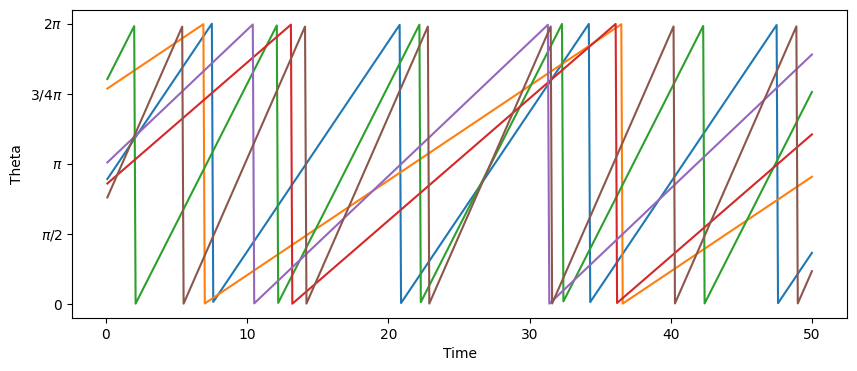

In [7]:
# setting parameters
N = 6
# cmat is the structural connectivity matrix (here we start with a fully
# connected network)
cmat = np.ones((N, N)) # fully connected network
# dmat is the delay matrix, at the moment we consider instantaneous interactions
# between brain regions, so no delays
dmat = np.zeros((N,N)) # no delays

# Let's create a network model!
network_model = KuramotoModel(Cmat=cmat, Dmat=dmat)
# Set the duration of the simulation
network_model.params['duration'] = 50
# Set the intrinsic frequency
network_model.params['omega'] = np.random.rand((N)) * 0.25 * np.pi
# Let's start without any noise
network_model.params['sigma_ou'] = 0.
# For now our oscillators are uncoupled, so K = 0
network_model.params['k'] = 0
network_model.run()

theta = network_model['theta'].T
# cap the phase to be between 0 and 2pi
theta_capped = np.mod(theta, 2*np.pi)

# set up the figure
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plt.plot(network_model.t, theta_capped)
plt.xlabel("Time")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise </b><p>

Change the coupling and noise to see what happens to the phases. What happens to the signals when you increase coupling? If you leave the coupling constant and increase noise, what happens? Does an increase in noise facilitate coupling or not?

=> Increased coupling increases synchronization between the oscillators, while increased noise doesn't increase synchronization but rather decreases it
<p>


In [8]:
#@title Run this cell to enable the widget
# Function to run the model and plot the results
def run_kuramoto_network_model(coupling, noise=0):
  # Let's create a network model!
  network_model = KuramotoModel(Cmat=cmat, Dmat=dmat)
  # Set the duration of the simulation
  network_model.params['duration'] = 50
  # Set the intrinsic frequencye
  network_model.params['omega'] = np.ones((N)) * 0.25 * np.pi
  # Let's start without any noise
  network_model.params['sigma_ou'] = noise
  # For now our oscillators are uncoupled, so K = 0
  network_model.params['k'] = coupling
  network_model.run()
  plt.plot(network_model.outputs['t'], network_model.outputs['theta'].T)
  plt.title('Kuramoto Model Output')
  plt.xlabel('Time')
  plt.ylabel('Theta')
  plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
  plt.show()

# Create interactive widgets for frequency and noise
coupling_slider = FloatSlider(min=0, max=1, step=0.01, value=0, description='Coupling')
noise_slider = FloatSlider(min=0, max=2, step=0.1, value=0, description='Noise')

# Use the interact function to update the model based on slider values
interact(run_kuramoto_network_model, coupling=coupling_slider, noise=noise_slider)

interactive(children=(FloatSlider(value=0.0, description='Coupling', max=1.0, step=0.01), FloatSlider(value=0.…

<function __main__.run_kuramoto_network_model(coupling, noise=0)>

Below you will find some bonus material on a pretty cool model, the so-called Hopf model. After the bonus, you will find further reading material/videos for your reference, which might also be useful to consider for your projects.

## Bonus: Normal form of a supercritical Hopf bifurcation

This Bonus will explore a phenomenological non-linear model of coupled oscillators knowns as the **Stuart-Landau model**, commonly referred to in the neuroscience context as the **Hopf model** (more precisely as the *normal form of a supercritical Hopf bifurcation*). This model is a canonical model to study systems of coupled oscillators for which both the phase and the amplitude interact. In this model, as nonlinearities increase, isolated nodes transit through two qualitatively different dynamics: from damped oscillations to self-sustained oscillations. Today we will focus on these dynamics. The dynamics of a single uncoupled node $i$ is given by the following differential equation, with complex variable $z$ as the state variable:

$$\dot{z}_{i} = (a_{i} + i\omega_{i})z_{i} - z_{i} |z_{i}^2| $$


The real part of $z$ is what we measure empirically, its imaginary part serves only for the equations, we can then write:

$$\dot{x}_{i} = (a_{i} - x_{i}^{2} - y_{i}^{2})x_{i} - \omega_{i}y_{i}$$

$$\dot{y}_{i} = (a_{i} - x_{i}^{2} - y_{i}^{2})y_{i} + {\omega}{i}x_{i} $$

$a$ is known as a bifurcation parameter and $\omega$ is the natural frequency of oscillation.

- If $a<0$ the system is characterised by a single stable point and
- if $a>0$ a limit cycle emerges and the system oscillates harmonically, with frequency $\omega$.
- The bifurcation point, is thus at $a=0$.

A bifurcation point is a point where a small change in system's parameters leads to big changes in the behavior (e.g., transition from stable point to oscillatory behavior). Supercritical means that a pair of stable point is created and exists after the bifurcation. "Hopf" is the name of the type of the bifurcation. Normal form means that the bifurcation occurs at 0.


<div class="alert alert-block alert-success">
<b> Bonus </b><p>

Implement the normal form of a supercritical Hopf bifurcation in the following function.

In [9]:
# Parameters
a = -0.1  # Bifurcation parameter
omega = 1  # Angular frequency

# Initial conditions
x0 = 0.1
y0 = 0.1

# Time span and step size
t_start = 0.0
t_end = 100.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

# Supercritical Hopf bifurcation normal form
def hopf_normal_form(x, y, a, omega):
    dx_dt = (a - x**2 - y**2) * x - omega * y
    dy_dt = (a - x**2 - y**2) * y + omega * x


    return dx_dt, dy_dt

<div class="alert alert-block alert-success">
<b> Bonus </b><p>

Now perform the Euler Integration as we did in class.

In [10]:
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0

for i in range(1, len(t)):
    dx, dy = hopf_normal_form(x[i-1], y[i-1], a, omega)
    x[i] = x[i-1] + dx * dt
    y[i] = y[i-1] + dy * dt

In [ ]:
#@title Unhide to copy the code if you are really stuck
# dx_dt = (a - x**2 - y**2) * x - omega * y
# dy_dt = (a - x**2 - y**2) * y + omega * x
# x[i] = x[i-1] + dx * dt
# y[i] = y[i-1] + dy * dt

<div class="alert alert-block alert-success">
<b> Bonus </b><p>

Finally, let's try to plot the phase plane (on the left) and the evolution of the signal x over time. Remember the difference between the two!

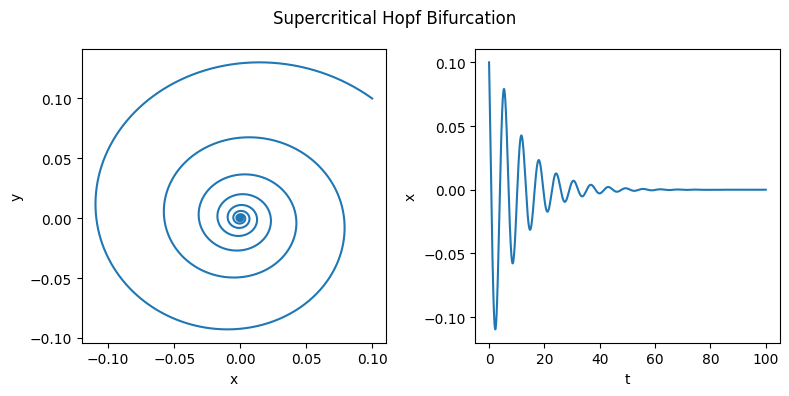

In [11]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
#axs[0].plot(...)
axs[0].plot(x, y)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(t, x)
# axs[1].plot(...)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')

fig.suptitle('Supercritical Hopf Bifurcation')
fig.tight_layout()
fig.show()

<div class="alert alert-block alert-success">
<b> Bonus </b><p>

Is the system going to a stable point or spiraling outwards? How do you know? How can you check?

<div class="alert alert-block alert-success">
<b> Bonus </b><p>

What happens if you add Gaussian noise to x[i] and y[i]?

After having created our simulation from scratch, we will now use the faster Neurolib to perform the simulation. First, let's recreate the same type of simulations (note Neurolib uses random initial conditions, so it won't be exactly the same, but the behavior is)

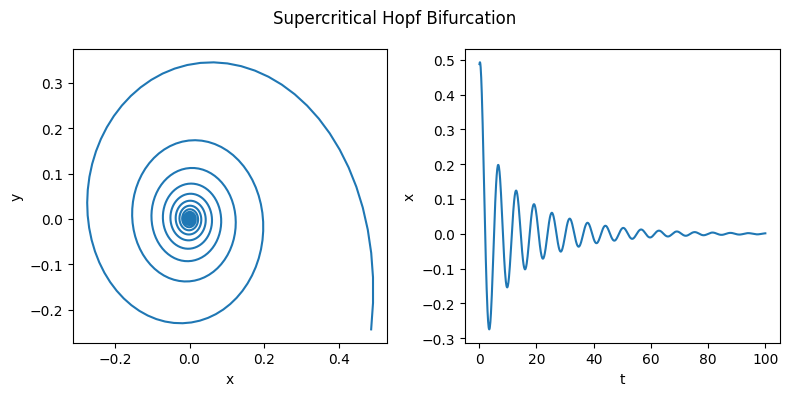

In [13]:
# Let's import the Hopf model
from neurolib.models.hopf import HopfModel

model = HopfModel()
model.params['duration'] = 100
model.params['sigma_ou'] = 0.00
model.params['a'] = -0.1
model.params["w"] = 1

model.run()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
axs[0].plot(model.x.T, model.y.T)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(model.t, model.x.T)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
fig.suptitle('Supercritical Hopf Bifurcation')
fig.tight_layout()

<div class="alert alert-block alert-success">
<b> Bonus </b><p>

Use the following widget to see how the activity changes in relation to the bifurcation parameters and intrinsic frequency. What do you see? When does the behavior change?

In [14]:
from ipywidgets import interact, FloatSlider

# Function to update plot
def update_plot(bif_param, frequency):
    model.params['a'] = bif_param
    model.params['w'] = frequency
    model.run()
    plt.figure(figsize=(4, 4))
    plt.plot(model.t, model.x.T, c='k', lw=2)
    plt.xlabel("t [ms]")
    plt.ylabel("Activity")
    plt.title(f"$a$: {bif_param}\n $\omega$: {frequency}")
    plt.grid(True)
    plt.show()

# Initialize model
model = HopfModel()
model.params['duration'] = 1.0 * 1000
model.params['sigma_ou'] = 0.0 # Noise
model.params['w'] = .1

model.run()

# Create interactive widget
interact(update_plot, bif_param=FloatSlider(min=-0.3, max=0.3, step=0.01, value=0.2),frequency=FloatSlider(min=0.0, max=0.3, step=0.01, value=0.1));
# @title Run this to enable the interactive widget


interactive(children=(FloatSlider(value=0.2, description='bif_param', max=0.3, min=-0.3, step=0.01), FloatSlid…

Text(0, 0.5, 'Min / max x')

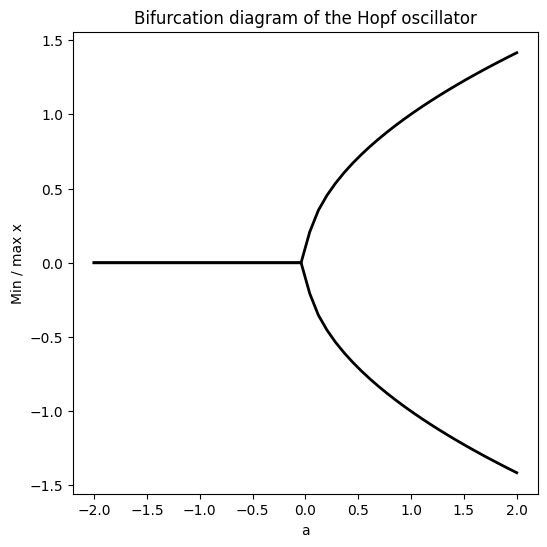

In [15]:
model = HopfModel()
model.params['duration'] = 2.0*1000

max_x = []
min_x = []
# these are the different input values that we want to scan
a_s = np.linspace(-2, 2, 50)
for a in a_s:
    model.params['a'] = a
    model.run()
    # we add the maximum and the minimum of the last second of the
    # simulation to a list
    max_x.append(np.max(model.x[0, -int(1000/model.params['dt']):]))
    min_x.append(np.min(model.x[0, -int(1000/model.params['dt']):]))

plt.figure(figsize=(6,6))
plt.plot(a_s, max_x, c='k', lw = 2)
plt.plot(a_s, min_x, c='k', lw = 2)
plt.title("Bifurcation diagram of the Hopf oscillator")
plt.xlabel("a")
plt.ylabel("Min / max x")
# @title Run this to plot the bifurcation diagram and see why it is called a bifurcation

## Further material for your future reference

*Visual understanding of differential equations and Euler integration*

[Visual introduction to differential equations](https://www.youtube.com/watch?v=p_di4Zn4wz4)

[Euler Integration Scheme](https://www.youtube.com/watch?v=q87L9R9v274)

___

*Introduction to WBM*

- OHBM 2024 Educational course on Connectome-based models of whole-brain dynamics. First lecture [here](https://www.youtube.com/watch?v=7xfQ2lcbZUA&t=1077s).

- C. Cakan, N. Jajcay, K. Obermayer, neurolib: A Simulation Framework for Whole-Brain Neural Mass Modeling. Cogn Comput (2021). https://doi.org/10.1007/s12559-021-09931-9.

- Griffiths, J.D., Bastiaens, S.P., Kaboodvand, N. (2022). Whole-Brain Modelling: Past, Present, and Future. In: Giugliano, M., Negrello, M., Linaro, D. (eds) Computational Modelling of the Brain. Advances in Experimental Medicine and Biology(), vol 1359. Springer, Cham. https://doi.org/10.1007/978-3-030-89439-9_13 (*general concepts + history, it should be available through RUB online*)

- Breakspear, M., Heitmann, S., Daffertshofer, A., (2010). Generative models of cortical oscillations: neurobiological implications of the Kuramoto model, Fron Hum Neuro, https://www.frontiersin.org/journals/human-neuroscience/articles/10.3389/fnhum.2010.00190/full

- Models of the Mind: How Physics, Engineering and Mathematics Have Shaped Our Understanding of the Brain by Grace Lindsay (this is a interesting entry-level book on the history of computational neuroscience and how mathematical models have been used to explore properties of the brain)

___
*Dynamical systems in WBM*

- M. Breakspear, Dynamic models of large-scale brain activity. Nat Neurosci 20, 340–352 (2017) (*general principles*)

- P. Sanz-Leon, S. A. Knock, A. Spiegler, V. K. Jirsa, Mathematical framework for large-scale brain network modeling in The Virtual Brain. NeuroImage 111, 385–430 (2015) (*all the math we did not cover today is presented here*)


___
*Criticality*

- J. O’Byrne, K. Jerbi, How critical is brain criticality? Trends in Neurosciences 45, 820–837 (2022).

- L. Cocchi, L. L. Gollo, A. Zalesky, M. Breakspear, Criticality in the brain: A synthesis of neurobiology, models and cognition. Progress in Neurobiology 158, 132–152 (2017).

___
*Moving towards clinical applications*

- G. Deco, V. K. Jirsa, A. R. McIntosh, Resting brains never rest: computational insights into potential cognitive architectures. Trends Neurosci 36, 268–274 (2013).

- G. Deco, M. L. Kringelbach, Great Expectations: Using Whole-Brain Computational Connectomics for Understanding Neuropsychiatric Disorders. Neuron 84, 892–905 (2014).

- X. Kobeleva, et al., Advancing brain network models to reconcile functional neuroimaging and clinical research. NeuroImage: Clinical 36, 103262 (2022).

# Acknowledgments
Parts of this tutorial were taken from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/intro.html). Their course on Computational Neuroscience delves into many more details on dynamical systems and biophysically detailed neural mass models. If you are interested in these topics, it is free to follow at your own pace.

[TVB](https://wiki.ebrains.eu/bin/view/Collabs/documentation/tutorials/The%20Virtual%20Brain/) also offers some more tutorials. Further tutorials  (credits to Davide Momi, Joana Cabral and John Griffiths) can be found [here](https://griffithslab.github.io/OHBM-whole-brain-modelling-course/).

